<a href="https://colab.research.google.com/github/ashante112/final_project/blob/main/Copy_of_Handwriting_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import dependancies

import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# from keras.utils import to_categorical 
# from tensorflow.keras import utils as np_utils
import pandas as pd
import numpy as np

# Sklearn scaling
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Google Collab
from google.colab.patches import cv2_imshow

In [ ]:
# print(keras.__version__)
!python --version

Python 3.7.10


# Load and Preprocessing Data

In [ ]:
import subprocess
print(subprocess.run(['ls'],text=True,capture_output=True).stdout)

A_Z_HandwrittenData.csv
sample_data



In [ ]:
data = pd.read_csv("A_Z_HandwrittenData.csv").astype('float32')
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Reshape dataset

In [ ]:
# Split label column from image data
X = data.drop('0',axis = 1)
y = data['0']

# Reshape [28 x 28 pixels]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))


In [ ]:
# Print shape
print("Training shape: ", x_train.shape)
print("Testing shape: ", x_test.shape)

Training shape:  (297960, 28, 28)
Testing shape:  (74490, 28, 28)


In [ ]:
letters = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

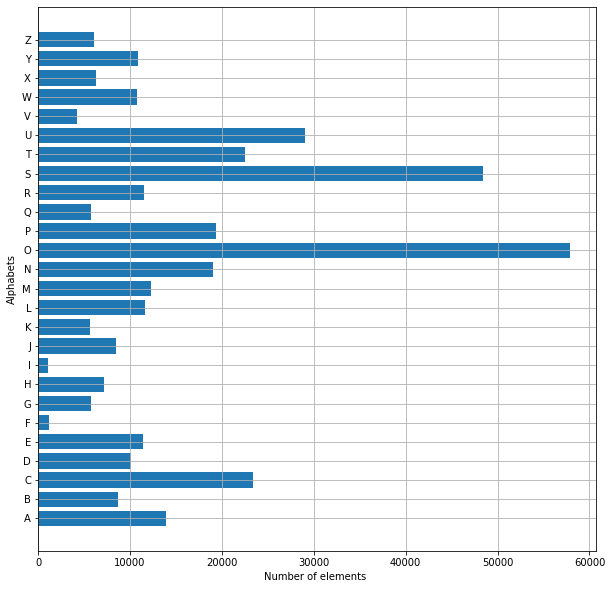

In [ ]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1
alphabets = []
for i in letters.values():
    alphabets.append(i)
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

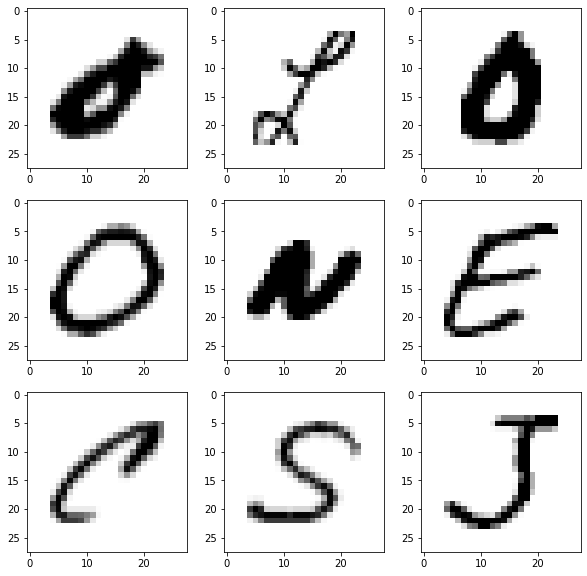

In [ ]:
shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()


#plt.imshow(shuff[0,:,:], cmap=plt.cm.Greys)


In [ ]:
# Reshape the train and test data

x_train_rs = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
print("New shape of train data: ", x_train_rs.shape)
x_test_rs = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of test data: ", x_test_rs.shape)


New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)


In [ ]:
# Reshape the train and test data

y_train_rs = to_categorical(y_train, num_classes = 26, dtype='int')
print("New shape of train labels: ", y_train_rs.shape)

y_test_rs = to_categorical(y_test, num_classes = 26, dtype='int')
print("New shape of test labels: ", y_test_rs.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
# Create a model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [ ]:
# Compile and fit the model

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_rs, y_train_rs, epochs=1,  validation_data = (x_test_rs,y_test_rs))

9312/9312 [==============================] - 68s 4ms/step - loss: 0.1673 - accuracy: 0.9546 - val_loss: 0.0645 - val_accuracy: 0.9810


In [ ]:
model.summary()
model.save('model_hand.h5')


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 26, 26, 32)        320       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 13, 13, 32)        0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 13, 13, 64)        18496     
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 6, 6, 64)          0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 4, 4, 128)         73856     
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 2, 2, 128)         0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 512)               0

NotImplementedError: ignored

In [ ]:
model.save_weights("model_hand_weight.h5")

In [ ]:
model_from_weights = Sequential()
model_from_weights.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_from_weights.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_from_weights.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model_from_weights.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_from_weights.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model_from_weights.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_from_weights.add(Flatten())
model_from_weights.add(Dense(64,activation ="relu"))
model_from_weights.add(Dense(128,activation ="relu"))
model_from_weights.add(Dense(26,activation ="softmax"))
model_from_weights.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model_from_weights.load_weights("model_hand_weight.h5")

ValueError: ignored

In [ ]:
pred = model.predict(x_test_rs[:9])
print(x_test_rs.shape)

(74490, 28, 28, 1)


In [ ]:
model_from_weights = 

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(x_test_rs[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = letters[np.argmax(y_test_rs[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
img = cv2.imread(r'letter_n_cap.jpeg')
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

In [ ]:
img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))

In [ ]:
img_pred = letters[np.argmax(model.predict(img_final))]

cv2.putText(img, "Letter Recognition", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (0,0,230))
cv2_imshow(img)

In [ ]:
# Fit (train) the model
# model.fit(
#     x_train_rs,
#     y_train_rs,
#     epochs=10,
#     shuffle=True,
#     verbose=2
# )

In [ ]:
# Load the model
# from tensorflow.keras.models import load_model
# model = load_model("model_hand.h5")

In [ ]:
# Evaluate the model using the training data 
# model_loss, model_accuracy = model.evaluate(x_test_rs, y_test_rs, verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Grab just one data point to test with
# test = np.expand_dims(x_train_rs[0], axis=0)
# test.shape

In [ ]:
# npxls = x_train_rs.shape[1]*x_train_rs.shape[2]
# x_train_rs = x_train_rs.reshape(x_train_rs.shape[0],npxls)
# x_train_rs.shape

In [ ]:
# Next, we normalize our training data to be between 0 and 1
# scaler = MinMaxScaler().fit(x_train_rs)

#x_train_rs = scaler.transform(x_train_rs)
#x_test_rs = scaler.transform(x_test_rs)

# Alternative way to normalize this dataset since we know that the max pixel value is 255
# x_train_rs = x_train_rs.astype("float32")
# x_test_rs = x_test_rs.astype("float32")
# x_train_rs /= 255.0
# x_test_rs /= 255.0

In [ ]:
# plt.imshow(scaler.inverse_transform(npxls).reshape(28, 28), cmap=plt.cm.Greys)

In [ ]:
#Import a custom image

# filepath = "letter_a.jpg"

In [ ]:
# from tensorflow.keras.preprocessing import image
# image_size = (28, 28)
# im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
# im

In [ ]:
# Convert the image to a numpy array 
# from tensorflow.keras.preprocessing.image import img_to_array
# image = img_to_array(im)
# image.shape

In [ ]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
# image /= 255

# Flatten into a 1x28*28 array 
# img = image.flatten().reshape(-1, 28*28)
# img.shape

In [ ]:
# plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [ ]:
# Invert the pixel values to match the original data
# img = 1 - img
# plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [ ]:
# Make predictions
# model.predict_classes(img)